In [10]:
import cv2
import os
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# calculate the BGR mean for each swatch
path = '/home/yafen/insight_project/Demos/img_swatch'
colors = []
for i in os.listdir(path):
    product_id = i.split('.')[0].strip()
    img_file = os.path.join(path,i)
    image = cv2.imread(img_file)
    bgr_mean = cv2.mean(image)[:3]
    colors.append({'product_id': product_id,
                        'bgr_mean': bgr_mean})
df_color = pd.DataFrame(colors)

In [3]:
cv2.mean(cv2.imread('/home/yafen/insight_project/Demos/img_swatch/2309946.jpg'))

(77.64583333333333, 79.39814814814814, 142.07407407407408, 0.0)

In [9]:
df_color.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  504 non-null    object
 1   bgr_mean    504 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [10]:
# read lipsticks.csv into dataframe
df_sephora = pd.read_csv('lipsticks.csv')
# df_ysl['product_id'] = df_ysl.product_id.astype('object')
# convert product_id column in df_color from obj to int, in order to merge
df_color.product_id = df_color.product_id.astype(int)

In [12]:
# merge df_sephora and df_color on product_id column
df_bgr = df_sephora.merge(df_color,on='product_id')
df_bgr

,product_id,brand,looks,price,product_url,product_img_url,color_img_url,color_code,color,bgr_mean
0,2352243,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N201 Rouge Tatouage,red bright,"(18.608024691358025, 12.409722222222221, 203.8..."
1,2352250,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N202 Coral Symbol,coral bright,"(74.47222222222221, 70.15277777777777, 217.474..."
2,2352268,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N203 Rose Dissident,fuschia,"(60.279320987654316, 28.577160493827158, 193.9..."
3,2352276,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N204 Beige Underground,nude beige,"(105.23842592592592, 103.57175925925925, 213.7..."
4,2352284,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N205 Rouge Clique,blue red,"(46.44753086419753, 17.705246913580247, 186.68..."
...,...,...,...,...,...,...,...,...,...,...
497,1860147,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,10 Clove Pop,brown neutral chocolate,"(74.94753086419753, 71.4074074074074, 155.2685..."
498,1860154,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,11 Peppermint Pop,blue red bright,"(93.79012345679011, 60.51466049382716, 224.746..."
499,1860162,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,12 Coral Pop,peach pinky mid-tone,"(107.72453703703704, 75.99074074074073, 240.86..."
500,1860170,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,13 Peony Pop,pink light,"(152.45679012345678, 127.84259259259258, 238.1..."


In [13]:
df_bgr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_id       502 non-null    int64 
 1   brand            502 non-null    object
 2   looks            502 non-null    object
 3   price            502 non-null    object
 4   product_url      502 non-null    object
 5   product_img_url  502 non-null    object
 6   color_img_url    502 non-null    object
 7   color_code       502 non-null    object
 8   color            502 non-null    object
 9   bgr_mean         502 non-null    object
dtypes: int64(1), object(9)
memory usage: 43.1+ KB


In [14]:
# save the merged dataframe df_bgr to a csv file
df_bgr.to_csv('lipsticks_bgr.csv',index=False)

In [3]:
# Python connect to posgresql
user = 'yafen' #add your Postgres username here
host = 'localhost'
dbname = 'p_demo'
pswd = '112358'
db = create_engine('postgres://%s:%s@%s/%s'%(user,pswd,host,dbname))
# query the lipsticks_bgr_table and read into a dataframe
query = "SELECT * FROM lipsticks_bgr_table;"
df_bgrmean = pd.read_sql_query(query,db)
df_bgrmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_id       502 non-null    int64 
 1   brand            502 non-null    object
 2   looks            502 non-null    object
 3   price            502 non-null    object
 4   product_url      502 non-null    object
 5   product_img_url  502 non-null    object
 6   color_img_url    502 non-null    object
 7   color_code       502 non-null    object
 8   color            502 non-null    object
 9   bgr_mean         502 non-null    object
dtypes: int64(1), object(9)
memory usage: 39.3+ KB


In [4]:
# convert the bgr mean values tuples to float32 since the KMeans input need to be float32
Z = []
for i in range(df_bgrmean.shape[0]):
    Z.append([float(e) for e in df_bgrmean.bgr_mean[i].strip('()').split(',')])
Z = np.array(Z,dtype='float32')
Z

array([[ 18.608025,  12.409722, 203.81018 ],
       [ 74.47222 ,  70.15278 , 217.47453 ],
       [ 60.27932 ,  28.57716 , 193.91975 ],
       ...,
       [107.72454 ,  75.99074 , 240.86806 ],
       [152.45679 , 127.84259 , 238.17516 ],
       [ 75.953705,  48.373455, 143.29013 ]], dtype=float32)

In [5]:
sum_square_dist = []
K = np.arange(1,50,2)
for k in K:
    kmeans = KMeans(n_clusters=k)
    sum_square_dist.append(kmeans.fit(Z).inertia_)
sum_square_dist = np.array(sum_square_dist)

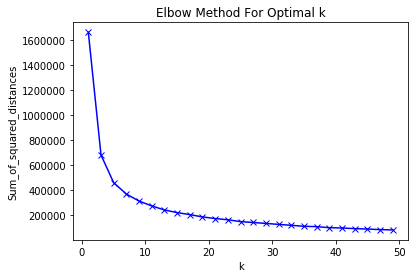

In [6]:
plt.plot(K, sum_square_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=15).fit(Z)
x = np.split(Z,3,axis=1)[0].flatten()
y = np.split(Z,3,axis=1)[1].flatten()
z = np.split(Z,3,axis=1)[2].flatten()
cluster = kmeans.labels_
centers = kmeans.cluster_centers_

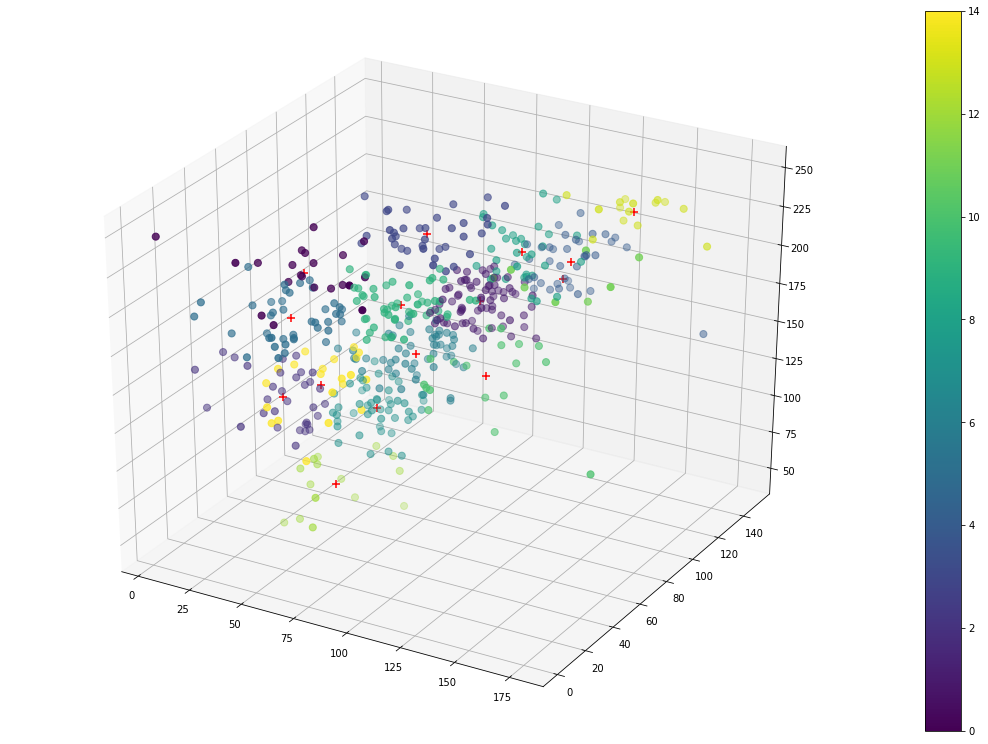

In [51]:
fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
scatter = ax.scatter(x,y,z,c=cluster,s=50)
for i,j,k in centers:
    ax.scatter(i,j,k,s=50,c='r',marker='+')
plt.colorbar(scatter)

In [52]:
df_bgrmean['color_label'] = kmeans.labels_
df_bgrmean.head()

,product_id,brand,looks,price,product_url,product_img_url,color_img_url,color_code,color,bgr_mean,color_label
0,2352243,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N201 Rouge Tatouage,red bright,"(18.608024691358025, 12.409722222222221, 203.8...",5
1,2352250,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N202 Coral Symbol,coral bright,"(74.47222222222221, 70.15277777777777, 217.474...",3
2,2352268,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N203 Rose Dissident,fuschia,"(60.279320987654316, 28.577160493827158, 193.9...",5
3,2352276,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N204 Beige Underground,nude beige,"(105.23842592592592, 103.57175925925925, 213.7...",8
4,2352284,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N205 Rouge Clique,blue red,"(46.44753086419753, 17.705246913580247, 186.68...",5


In [37]:
kmeans.labels_

array([3, 4, 3, 4, 3, 2, 3, 1, 0, 2, 2, 0], dtype=int32)

In [108]:
df_bgrmean['color_distance'] = 0
for i in range(len(centers)):
    idx = df_bgrmean[df_bgrmean['color_label'] == i].index
    df_bgrmean['color_distance'][idx] = np.sqrt(((centers[i]-Z[idx])**2).sum(axis=1))

/home/yafen/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
idx = df_bgrmean[df_bgrmean['color_label'] == 0].index
# df_bgrmean.iloc[df_bgrmean[df_bgrmean['color_label'] == 0].index]['color_label']
centers[0]
Z[idx][0]
np.linalg.norm(centers[0]-Z[idx][1])
np.sqrt(((centers[0]-Z[idx])**2).sum(axis=1)).shape
len(idx)
df_bgrmean['color_distance'] = 0
df_bgrmean['color_distance'][idx] = np.sqrt(((centers[0]-Z[idx])**2).sum(axis=1))

/home/yafen/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [111]:
label = kmeans.predict(np.reshape(np.array([28.01298701298701, 51.099567099567096, 222.42943722943724],dtype='float32'),(1,-1)))

In [134]:
if np.sqrt(((np.array([28.01298701298701, 51.099567099567096, 222.42943722943724],dtype='float32')-centers[label[0]])**2).sum()) <= df_bgrmean[df_bgrmean['color_label'] == label[0]].color_distance.max():
#     print(df_bgrmean.head())
    df_result = df_bgrmean[df_bgrmean['color_label'] == label[0]].sort_values(by='color_distance')[:5]
else:
    print("Sorry, the color you're looking is very special and we couldn't find a good match in our database.")
df_result

,product_id,brand,looks,price,product_url,product_img_url,color_img_url,color_code,color,bgr_mean,color_label,color_distance
168,2341493,Yves Saint Laurent,Matte finish,$39.00,https://www.sephora.com/product/rouge-pur-cout...,https://www.sephora.com/productimages/sku/s234...,https://www.sephora.com/productimages/sku/s234...,26 Rouge Mirage,orange red,"(56.92438271604938, 32.888888888888886, 227.78...",0,6.335000
228,2309607,Gucci,Satin finish,$42.00,https://www.sephora.com/product/gucci-rouge-ag...,https://www.sephora.com/productimages/sku/s230...,https://www.sephora.com/productimages/sku/s230...,500 Odalie Red,vivid red satin,"(47.74382716049382, 31.935185185185183, 224.26...",0,9.978645
116,2104347,Armani Beauty,Matte finish,$38.00,https://www.sephora.com/product/rouge-d-armani...,https://www.sephora.com/productimages/sku/s210...,https://www.sephora.com/productimages/sku/s210...,402 Red-to-go,tangerine,"(50.797839506172835, 36.08101851851852, 230.18...",0,11.652808
230,2309623,Gucci,Satin finish,$42.00,https://www.sephora.com/product/gucci-rouge-ag...,https://www.sephora.com/productimages/sku/s230...,https://www.sephora.com/productimages/sku/s230...,502 Eadie Scarlet,red satin scarlet,"(64.93132716049382, 32.779320987654316, 214.31...",0,15.093676
231,2309789,Gucci,Satin finish,$42.00,https://www.sephora.com/product/gucci-rouge-ag...,https://www.sephora.com/productimages/sku/s230...,https://www.sephora.com/productimages/sku/s230...,503 Teresina Ruby,red satin ruby,"(49.138888888888886, 36.041666666666664, 214.8...",0,15.596095


In [109]:
df_bgrmean

,product_id,brand,looks,price,product_url,product_img_url,color_img_url,color_code,color,bgr_mean,color_label,color_distance
0,2352243,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N201 Rouge Tatouage,red bright,"(18.608024691358025, 12.409722222222221, 203.8...",5,36.741741
1,2352250,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N202 Coral Symbol,coral bright,"(74.47222222222221, 70.15277777777777, 217.474...",3,16.689157
2,2352268,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N203 Rose Dissident,fuschia,"(60.279320987654316, 28.577160493827158, 193.9...",5,15.091977
3,2352276,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N204 Beige Underground,nude beige,"(105.23842592592592, 103.57175925925925, 213.7...",8,9.551879
4,2352284,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N205 Rouge Clique,blue red,"(46.44753086419753, 17.705246913580247, 186.68...",5,14.770492
...,...,...,...,...,...,...,...,...,...,...,...,...
497,1860147,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,10 Clove Pop,brown neutral chocolate,"(74.94753086419753, 71.4074074074074, 155.2685...",6,4.963845
498,1860154,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,11 Peppermint Pop,blue red bright,"(93.79012345679011, 60.51466049382716, 224.746...",3,14.933176
499,1860162,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,12 Coral Pop,peach pinky mid-tone,"(107.72453703703704, 75.99074074074073, 240.86...",3,26.332659
500,1860170,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,13 Peony Pop,pink light,"(152.45679012345678, 127.84259259259258, 238.1...",13,13.803697


In [18]:
dbscan = DBSCAN(eps=10,min_samples=2).fit(Z)

In [19]:
dbscan.labels_

array([ 0,  1,  2,  3,  4, -1,  4, -1,  5,  6, -1,  5,  5,  7,  5,  5,  5,
        8,  8,  5, -1, -1, -1,  5,  5,  5,  5,  5,  5,  5,  5,  9,  1, -1,
        2, 10,  5, 11,  5, 12, 10, 12,  5, 13, 14,  3,  5,  5, -1, 15,  2,
        5,  5,  5,  5,  1,  2,  5,  5,  1, 16, 17,  2, 18, 19, 17, -1, -1,
       -1, 20,  5,  5,  5,  5, -1,  5,  5, -1, 21, 15, 22, 23,  6, 10,  5,
       12, 12, 12, 12,  5,  5, -1, -1, -1, 20, 20, -1,  1, -1, 24, 10, 10,
        5,  5,  5,  5,  5,  5,  5, -1,  5,  5,  5, -1,  5,  2, 25,  2,  5,
        5,  5,  5,  5,  2, 12, -1, 13,  5,  5, 26, 16,  1, 27,  5,  5,  7,
        7,  1,  2,  5,  3, 10,  4,  5,  5,  5, 17,  1, 28, 29, 30, -1, 12,
        5,  5, 13,  5, -1, -1,  5,  3,  4, 19, 18,  5, 17,  3, 30, 25, 31,
       -1, -1, 32, -1,  4, -1,  5,  5, -1, 28,  5, -1, 31, 31,  3, 25,  5,
        3,  5, -1, -1, 33, -1, 16, -1, 34, -1, -1,  8,  5, -1, -1, 23, 17,
       35, 35, 36, -1,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 27, 33,
       -1, -1, -1, 34, -1